# Duration Analysis: Planned vs Actual Duration

Compare the planned duration versus actual duration across different scheduling models using histograms.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Read all CSV files in the results directory
#csv_files = glob.glob('../output/results/schedule_*.csv')
csv_files = ['../output/results/schedule_LogNormalDistributionModel.csv', '../output/results/schedule_TruthModel.csv', '../output/results/schedule_AverageOperationModel.csv', '../output/results/schedule_CausalModel.csv']
data_frames = {}

for file in csv_files:
    model_name = file.split('_')[-1].replace('.csv','')
    data_frames[model_name] = pd.read_csv(file)

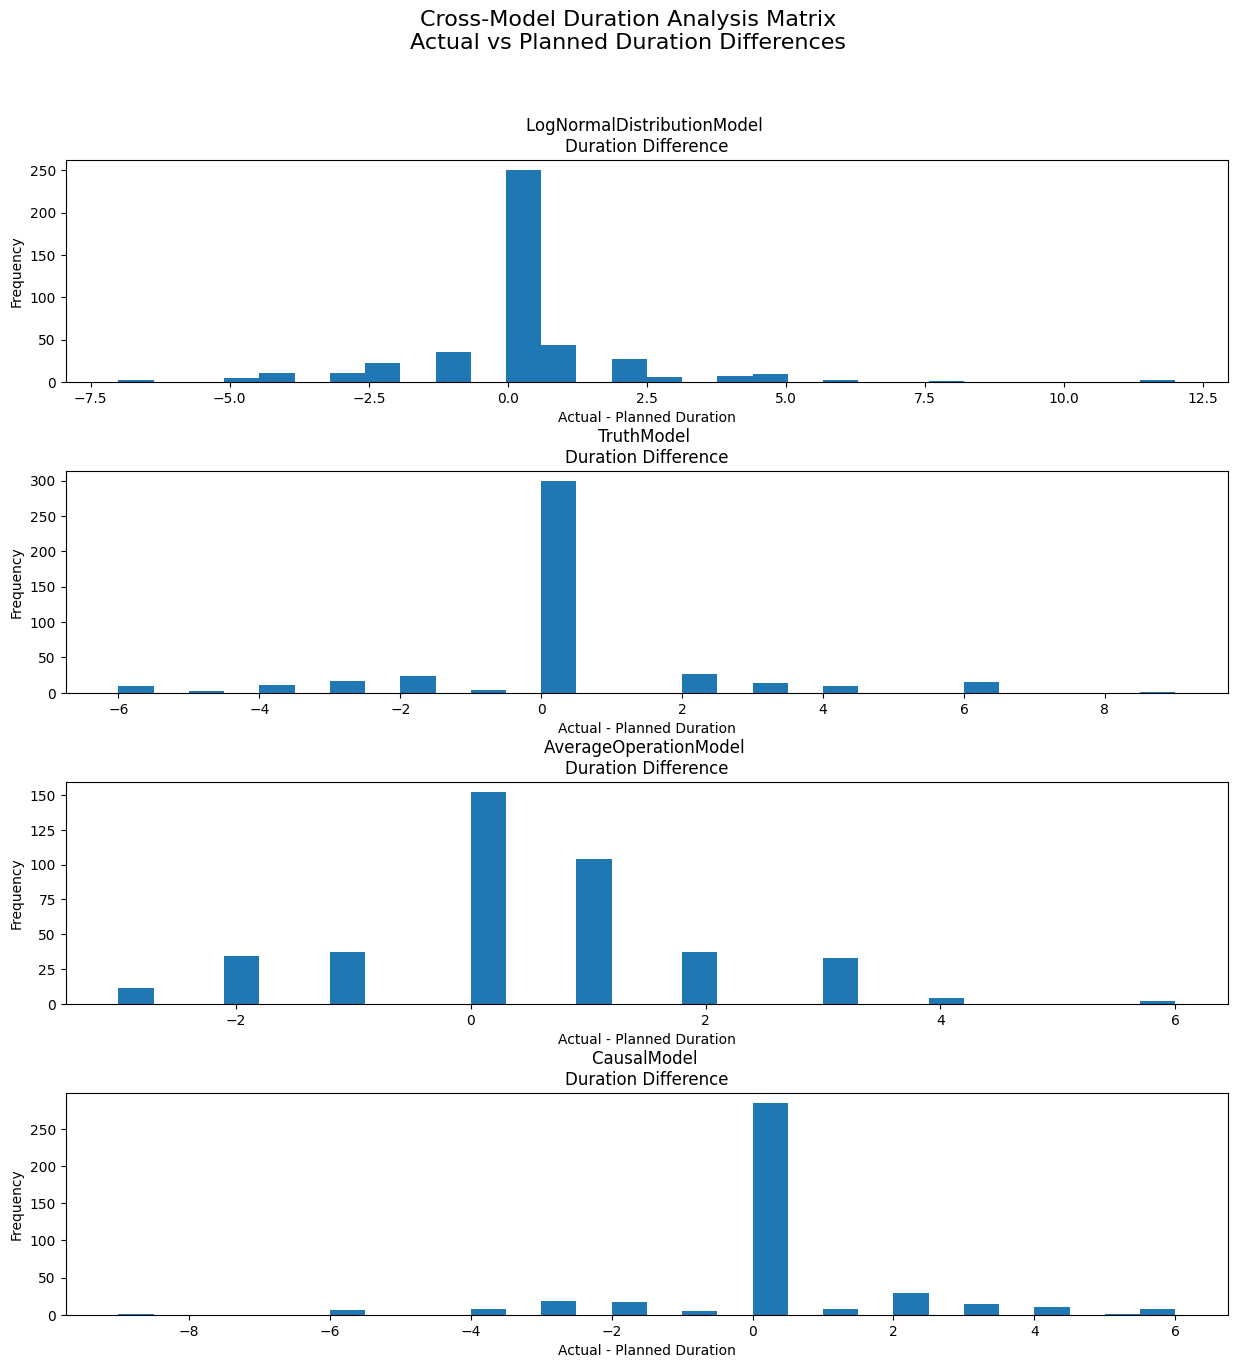

In [14]:
# Create matrix plot comparing planned vs actual duration
models = list(data_frames.keys())
n_models = len(models)

fig, axes = plt.subplots(n_models, figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, model1 in enumerate(models):
    df1 = data_frames[model1]
    
    # Plot histogram of differences
    diff = df1['duration'] - df1['plan_duration']
    axes[i].hist(diff, bins=30)
    axes[i].set_title(f'{model1} \nDuration Difference')
    axes[i].set_xlabel('Actual - Planned Duration')
    axes[i].set_ylabel('Frequency')

plt.suptitle('Cross-Model Duration Analysis Matrix\nActual vs Planned Duration Differences', size=16)
plt.show()

In [15]:
# Statistical summary of differences
for model1 in models:
    for model2 in models:
        df1 = data_frames[model1]
        df2 = data_frames[model2]
        diff = df1['duration'] - df2['plan_duration']
        
        print(f"\n{model1} actual vs {model2} planned:")
        print(f"Mean difference: {diff.mean():.2f}")
        print(f"Std deviation: {diff.std():.2f}")
        print(f"Median difference: {diff.median():.2f}")


LogNormalDistributionModel actual vs LogNormalDistributionModel planned:
Mean difference: 0.09
Std deviation: 1.91
Median difference: 0.00

LogNormalDistributionModel actual vs TruthModel planned:
Mean difference: 0.09
Std deviation: 1.91
Median difference: 0.00

LogNormalDistributionModel actual vs AverageOperationModel planned:
Mean difference: -1.59
Std deviation: 13.99
Median difference: 0.00

LogNormalDistributionModel actual vs CausalModel planned:
Mean difference: -1.63
Std deviation: 13.89
Median difference: 0.00

TruthModel actual vs LogNormalDistributionModel planned:
Mean difference: 0.05
Std deviation: 2.04
Median difference: 0.00

TruthModel actual vs TruthModel planned:
Mean difference: 0.05
Std deviation: 2.04
Median difference: 0.00

TruthModel actual vs AverageOperationModel planned:
Mean difference: -1.65
Std deviation: 13.89
Median difference: 0.00

TruthModel actual vs CausalModel planned:
Mean difference: -1.69
Std deviation: 13.79
Median difference: 0.00

Average